<a href="https://colab.research.google.com/github/oonya/Segmentation/blob/master/findCon_tutorial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from google.colab import files
uploaded_file = files.upload()

# !ls

Saving bear.jpg to bear.jpg


In [0]:
# note

import cv2
import numpy as np
import matplotlib.pyplot as plt

from sklearn.cluster import KMeans

# 画像を読み込む。
src = cv2.imread("three.jpg")
src = cv2.cvtColor(src, cv2.COLOR_BGR2RGB)

img = src.reshape((-1, 3))
img = np.float32(img)

criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 10, 1.0)

K = 15

ret, label, center = cv2.kmeans(img, K, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)

model = KMeans(n_clusters=K, random_state=10).fit(img)

center = np.uint8(center)
# print(center)

# for l in range(0, K):
#   mean = np.mean(res[label==l, :], axis=0)
#   res[label==l, :] = mean


# res = center[label.flatten()]

# res2 = res.reshape(src.shape)

plt.imshow(res2)

# uniq_rgb = center

# # 2回目のクラスタリング
# uniq_rgb = np.float32(uniq_rgb)
# uniq_rgb.resize(1, K, 3)

# ret, label, center = cv2.kmeans(uniq_rgb, 5 , None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)

# print(center)

# sklearn.cluster

error: ignored

In [0]:
# note

import cv2
import numpy as np
import matplotlib.pyplot as plt


# 画像を読み込む。
src = cv2.imread("jinken.jpeg")
src = cv2.cvtColor(src, cv2.COLOR_BGR2RGB)

img = src.reshape((-1, 3))
img = np.float32(img)

criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 10, 1.0)

K = 15

ret, label, center = cv2.kmeans(img, K, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)

center = np.uint8(center)
res = center[label.flatten()]

# res2 = res.reshape(src.shape)

# plt.imshow(res2)

res = np.float32(res)
ret, label, center = cv2.kmeans(res, 6, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)

center = np.uint8(center)
res = center[label.flatten()]


# res = np.float32(res)
# ret, label, center = cv2.kmeans(res, 3, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)

# center = np.uint8(center)
# res = center[label.flatten()]

res2 = res.reshape(src.shape)
plt.imshow(res2)

print(center)


error: ignored

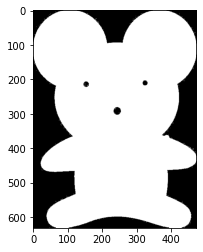

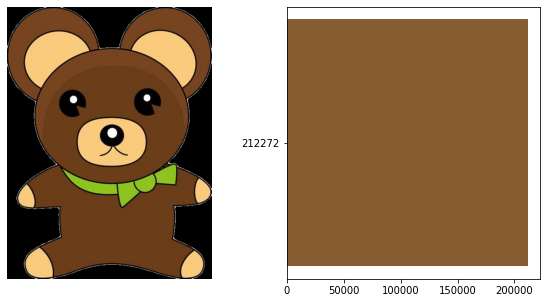

In [0]:
import cv2
import numpy as np
import matplotlib.pyplot as plt


# 画像を読み込む。
img = cv2.imread("bear.jpg")

# gray に変換する。
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# 水色かどうかで2値化する。(水色は0、それ以外は255)
binary = cv2.inRange(gray,240, 255)
binary = ~binary

plt.gray()
plt.imshow(binary)

# メディアンフィルタで端をなめらかにする。
binary = cv2.medianBlur(binary, 7)

# 輪郭抽出を実行する。
contours, hierarchy = cv2.findContours(
    binary, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE
)

for cnt in contours:
    # ROI 領域以外をマスクする。
    mask = np.zeros_like(img)
    cv2.drawContours(mask, [cnt], -1, color=(255, 255, 255), thickness=-1)
    masked = img & mask

    # 色一覧
    colors = masked.reshape(-1, 3)
    colors = colors[(colors != 0).all(axis=1)]  # 黒は除く

    # k平均法でクラスタリングする。
    k = 1
    criteria = cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 10, 1.0
    ret, label, center = cv2.kmeans(
        colors.astype(np.float32), k, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS
    )

    # 円の中に含まれる代表色 Top3 を可視化する。
    fig, [ax1, ax2] = plt.subplots(1, 2, figsize=(10, 5))
    # 各クラスに属するサンプル数を計算する。
    height = [np.count_nonzero(label == i) for i in range(k)]
    # 各クラスたの色を取得する。matplotlib の引数の仕様上、[0, 1] にして、(R, G, B) の順番にする。
    rep_color = (center / 255)[:, ::-1]

    # 画像を表示する。
    ax1.imshow(cv2.cvtColor(masked, cv2.COLOR_BGR2RGB))
    ax1.set_axis_off()

    # ヒストグラムを表示する。
    ax2.barh(np.arange(k), height, color=rep_color, tick_label=height)
    plt.show()